<a href="https://colab.research.google.com/github/saadkamal219/Artificial_Intilligence/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''

Pipeline:

1. Data load
2. Polynomial transform
3. Linear Regression
4. Prediction

'''

'\n\nPipeline:\n\n1. Data load\n2. Polynomial transform\n3. Linear Regression\n4. Prediction\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

In [5]:
x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

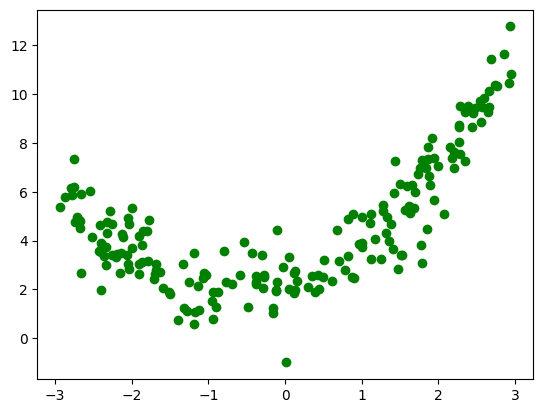

In [6]:
plt.scatter(x, y, marker='o', color='green')

In [ ]:
#first we will use linear regression for this model and justify the results and then we will use the correct way

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [11]:
obj = LinearRegression()

obj.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = obj.predict(x_test)

accuracy_with_dirrect_linear_regression = r2_score(y_test, y_pred)

Text(0, 0.5, 'y')

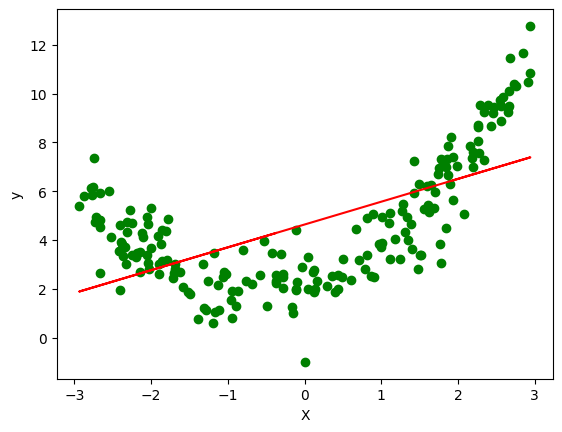

In [17]:
plt.plot(x_train,obj.predict(x_train),color='r')
plt.scatter(x, y, marker='o', color='green')
plt.xlabel("X")
plt.ylabel("y")

Polynomial Approach

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=True)

x_train_transform = poly.fit_transform(x_train)
x_test_transform = poly.fit_transform(x_test)

In [42]:
new_obj = LinearRegression()

new_obj.fit(x_train_transform, y_train)

LinearRegression()

In [43]:
new_obj.coef_

array([[0.        , 0.94123429, 0.74666429]])

In [44]:
new_obj.intercept_

array([2.24159249])

In [45]:
y_predict = new_obj.predict(x_test_transform)

In [46]:
accuracy_with_polynomial_regression = r2_score(y_test, y_predict)

In [47]:
print("Accuracy with just linear regression:" ,accuracy_with_dirrect_linear_regression * 100)
print("Accuracy with polynomial regression: ", accuracy_with_polynomial_regression * 100)

Accuracy with just linear regression: 10.58529189098627
Accuracy with polynomial regression:  76.10130917709795


In [48]:
x_new=np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = new_obj.predict(x_new_poly)

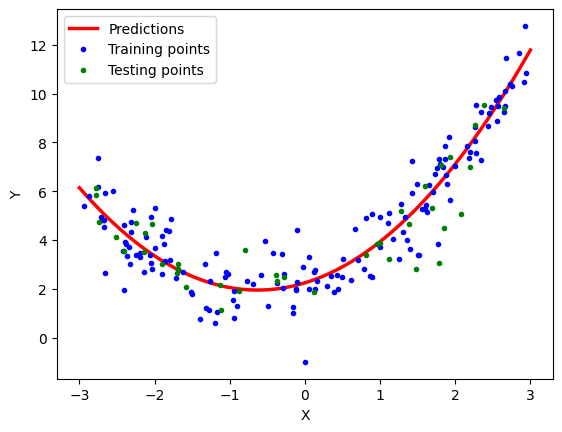

In [51]:
plt.plot(x_new, y_new, "r-", linewidth=2.5, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Polynomial SGD Regression

In [52]:
sgd = SGDRegressor(max_iter=3000)
sgd.fit(x_train_transform, y_train)
y_pred_sgd = sgd.predict(x_test_transform)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print("Accuracy with polynomial SGD regression: ", r2_score(y_test, y_pred_sgd) * 100)

Accuracy with polynomial SGD regression:  76.30519397604026


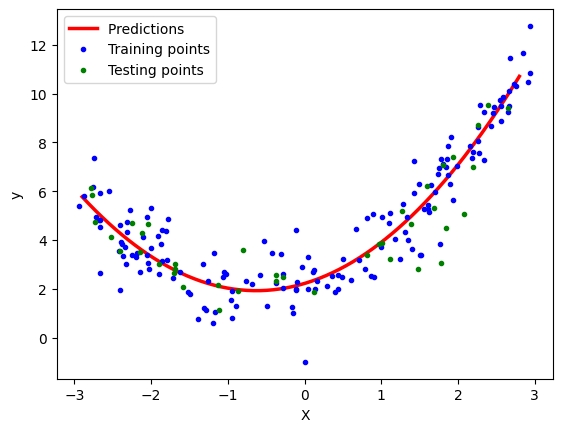

In [55]:
x_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = sgd.predict(x_new_poly)


plt.plot(x_new, y_new, "r-", linewidth=2.5, label="Predictions ")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()